# Practical Linear Algebra for Data Science
## Mike X Cohen (sincxpress.com)
### https://www.oreilly.com/library/view/practical-linear-algebra/9781098120603/

#### Code for chapter 7

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# The matrix inverse

In [ ]:
# a matrix
A = np.array([ [1,4],[2,7] ])

# its inverse
Ainv = np.linalg.inv(A)

# confirm that it produces the identity matrix
A@Ainv

In [ ]:
# The matrices visualized

fig,axs = plt.subplots(1,3,figsize=(10,6))


# the matrix
axs[0].imshow(A,cmap='gray')
axs[0].set_title('The matrix')
for (j,i),num in np.ndenumerate(A):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

# its inverse
axs[1].imshow(Ainv,cmap='gray')
axs[1].set_title('Its inverse')
for (j,i),num in np.ndenumerate(Ainv):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

# their product
AAi = A@Ainv
axs[2].imshow(AAi,cmap='gray')
axs[2].set_title('Their product')
for (j,i),num in np.ndenumerate(AAi):
  axs[2].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)


# common properties
for i in range(3):
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_01.png',dpi=300)
plt.show()

In [ ]:
# the full inverse is two-sided
print( A@Ainv ), print(' ')
print( Ainv@A )

In [ ]:
# reminder to use the correct operator:
A*Ainv # Hadamard multiplication!

In [ ]:
# try again with a singular matrix
A = np.array([ [1,4],[2,8] ])

# its inverse
Ainv = np.linalg.inv(A)

# does it produce the identity matrix?
A@Ainv

# Inverse of a diagonal matrix

In [ ]:
D = np.diag( np.arange(1,6) )
Dinv = np.linalg.inv(D)

print('The diagonal matrix:')
print(D), print(' ')

print('Its inverse:')
print(Dinv), print(' ')

print('Their product:')
print(D@Dinv)

# The left-inverse

In [ ]:
# making an invertible square matrix from a tall full column-rank matrix

# here's a tall matrix.
T = np.random.randint(-10,11,size=(40,4))

# confirm that it has its maximum possible rank (full column-rank)
print( f'This matrix has rank={np.linalg.matrix_rank(T)}\n\n' )

# next, create a square full-rank matrix
TtT = T.T@T

# check whether it has an inverse
TtT_inv = np.linalg.inv(TtT)
print( np.round(TtT_inv@TtT,4) )

In [ ]:
# finish creating the left-inverse

# our left-inverse
L = TtT_inv @ T.T

# confirm that it works
print( np.round( L@T,6 ) ), print(' ')

# but it's one-sided!
print( np.round( T@L,6 ) )


In [ ]:
# visualize! of course :)

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(T,cmap='gray')
axs[0,0].set_title('Tall matrix')

axs[0,1].imshow(L,cmap='gray')
axs[0,1].set_title('Left inverse')

axs[1,0].imshow(L@T,cmap='gray')
axs[1,0].set_title('L@T')

axs[1,1].imshow(T@L,cmap='gray')
axs[1,1].set_title('T@L')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.savefig('Figure_07_04.png',dpi=300)
plt.show()

# MP pseudoinverse

In [ ]:
# The same singular matrix as before
A = np.array([ [1,4],[2,8] ])

# its inverse
Apinv = np.linalg.pinv(A)
print(Apinv*85), print(' ')

# does it produce the identity matrix?
A@Apinv

In [ ]:
# an exmple with random numbers
A = np.random.randn(7,5) @ np.random.randn(5,7)
print(f'The rank of this matrix is {np.linalg.matrix_rank(A)}.\n')

Apinv = np.linalg.pinv(A)
plt.imshow(A@Apinv)
plt.title('The matrix times its pinv')
plt.colorbar()
plt.show()

# Exercise 1

In [ ]:
n = 5

# the matrix
A = np.random.randn(n,n)

# its inverse, and its inverse's inverse
Ai  = np.linalg.inv(A)
Aii = np.linalg.inv(Ai)

# equal the original matrix within tolerance
np.round( A-Aii ,10)

# Exercise 2

In [ ]:
# create matrix
m = 4
A = np.random.randn(m,m)

# initialize
M = np.zeros((m,m)) # minors matrix
G = np.zeros((m,m)) # grid matrix

# compute minors matrix
for i in range(m):
  for j in range(m):
    
    # select rows and cols
    rows = [True]*m
    rows[i] = False
    
    cols = [True]*m
    cols[j] = False
    
    # compute the minors
    M[i,j]=np.linalg.det(A[rows,:][:,cols])
    
    # compute Grid
    G[i,j] = (-1)**(i+j)

        
# compute cofactors matrix
C = M * G

# compute adjugate matrix
Ainv = C.T / np.linalg.det(A)

# 'regular' inverse function
AinvI = np.linalg.inv(A)

# compare against inv()
np.round( AinvI-Ainv ,8)

In [ ]:
# plot them

fig,axs = plt.subplots(2,3,figsize=(14,7))

axs[0,0].imshow(M,cmap='gray')
axs[0,0].set_title('Minors matrix')

axs[0,1].imshow(G,cmap='gray')
axs[0,1].set_title('Grid matrix')

axs[0,2].imshow(C,cmap='gray')
axs[0,2].set_title('Cofactors matrix')

axs[1,0].imshow(Ainv,cmap='gray')
axs[1,0].set_title('Adjugate (inverse)')

axs[1,1].imshow(AinvI,cmap='gray')
axs[1,1].set_title('np.linalg.inv')

axs[1,2].imshow(A@Ainv,cmap='gray')
axs[1,2].set_title('A@Ainv')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])


plt.savefig('Figure_07_03.png',dpi=300)
plt.show()

# Exercise 4

In [ ]:
# Start from the code for the left-inverse, and swap as necessary.

# here's a wide matrix.
W = np.random.randint(-10,11,size=(4,40))

# confirm that it has its maximum possible rank (full row-rank)
print( f'This matrix has rank={np.linalg.matrix_rank(W)}\n\n' )

# next, create a square full-rank matrix
WWt = W@W.T

# check whether it has an inverse
WWt_inv = np.linalg.inv(WWt)
print( np.round(WWt_inv@WWt,4) )

In [ ]:
# finish creating the right-inverse

# our right-inverse
R = W.T @ WWt_inv

# confirm that it works
print( np.round( W@R,6 ) ), print(' ')

# but it's one-sided!
print( np.round( R@W,6 ) )


In [ ]:
# visualize! of course :)

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(W,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@W,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(W@R,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.show()

# Exercise 5

In [ ]:
# Full inverse case
M = 4

A = np.random.randn(M,M)

Ainv  = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)

np.round( Ainv-Apinv,10 )

In [ ]:
# left inverse case
M,N = 14,4

A = np.random.randn(M,N)

ALeft = np.linalg.inv(A.T@A) @ A.T
Apinv = np.linalg.pinv(A)

np.round( ALeft-Apinv,10 )

In [ ]:
# right inverse case
M,N = 4,14

A = np.random.randn(M,N)

ARight = A.T @ np.linalg.inv(A@A.T)
Apinv  = np.linalg.pinv(A)

np.round( ARight-Apinv,10 )

# Exercise 6

In [ ]:
# create the matrices
N = 4
A = np.random.randn(N,N)
B = np.random.randn(N,N)

# compute the three specified options
op1 = np.linalg.inv(A@B)
op2 = np.linalg.inv(A) @ np.linalg.inv(B)
op3 = np.linalg.inv(B) @ np.linalg.inv(A)

# compute distances
dist12 = np.sqrt(np.sum( (op1-op2)**2 ))
dist13 = np.sqrt(np.sum( (op1-op3)**2 ))

# print results!
print(f'Distance between (AB)^-1 and (A^-1)(B^-1) is {dist12:.8f}')
print(f'Distance between (AB)^-1 and (B^-1)(A^-1) is {dist13:.8f}')

# Exercise 7

In [ ]:
# create the matrices
M,N = 14,4
T = np.random.randn(M,N)

# compute the three specified options
op1 = np.linalg.inv(T.T@T)
op2 = np.linalg.inv(T) @ np.linalg.inv(T.T)

# The answer is No, it doesn't work, because a tall matrix has no inverse.

# Exercise 8

In [ ]:
# Transformation matrix
T = np.array([ 
              [1,.5],
              [0,.5]
            ])

# Compute its inverse
Ti = np.linalg.inv(T)


# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints

# undo the transformation via the inverse of the transform
backTransformed   = Ti @ transformedPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')
plt.plot(backTransformed[0,:],backTransformed[1,:],'rx',markersize=15,
         color=[.7,.7,.7],label='Inverse-transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.savefig('Figure_07_06.png',dpi=300)
plt.show()

# Exercise 9

In [5]:
# a function to create a Hilbert matrix
def hilbmat(k):
  H = np.zeros((k,k))
  for i in range(k):
    for j in range(k):

      # note: the math formula has denominator: i+j-1
      #   but with 0-based indexing, this is: (i+1)+(j+1)-1
      #   which can be shortened to: i+j+1

      H[i,j] = 1 / (i+j+1)
  return H

  

# The double for-loop above is a direct implementation of the math.
# The function below gives the same result but without the loops.
def hilbmat(k):
  k = np.arange(1,k+1).reshape(1,-1) # reshape to a row vector (instead of a 1D array)
  return 1 / (k.T+k-1) # outer product and element-wise division

In [6]:
print( hilbmat(5) ), print(' ')

# you can confirm the accuracy of your function against the scipy Hilbert-matrix function:
from scipy.linalg import hilbert
print( hilbert(5) )

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
 
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


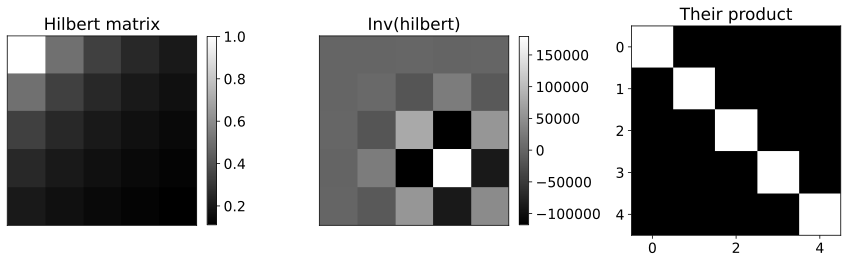

In [7]:
# create a 5x5 Hilbert matrix and show it, its inverse, and their product
H = hilbmat(5)
Hi = np.linalg.inv(H)

fig,axs = plt.subplots(1,3,figsize=(12,6))
h = [0,0,0]

# the matrix
h[0] = axs[0].imshow(H,cmap='gray')
axs[0].set_title('Hilbert matrix')

# its inverse
h[1] = axs[1].imshow(Hi,cmap='gray')
axs[1].set_title('Inv(hilbert)')

# their product
h[2] = axs[2].imshow(H@Hi,cmap='gray')
axs[2].set_title('Their product')


for i in range(2):
  fig.colorbar(h[i],ax=axs[i],fraction=.045)
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_05.png',dpi=300)
plt.show()

# Exercise 10

In [ ]:

matSizes = np.arange(3,13)

identityError = np.zeros((len(matSizes),2))
condNumbers   = np.zeros((len(matSizes),2))


for i,k in enumerate(matSizes):
    
    ### for the Hilbert matrix
    H   = hilbmat(k)       # the matrix
    Hi  = np.linalg.inv(H) # its inverse
    HHi = H@Hi             # should be identity
    err = HHi - np.eye(k)  # difference from true identity
    identityError[i,0] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,0] = np.linalg.cond(H) # condition number
    

    ### repeat for a random matrix
    H = np.random.randn(k,k) # the matrix
    Hi  = np.linalg.inv(H)   # its inverse
    HHi = H@Hi               # should be identity
    err = HHi - np.eye(k)    # difference from true identity
    identityError[i,1] = np.sqrt(np.sum(err**2))  # Euclidean distance
    condNumbers[i,1] = np.linalg.cond(H) # condition number
    


# now plot
fig,axs = plt.subplots(1,2,figsize=(14,5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes,np.log(identityError),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')



## plot the condition numbers
h = axs[1].plot(matSizes,np.log(condNumbers),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.savefig('Figure_07_07.png',dpi=300)
plt.show()

In [ ]:
## interesting to see the "identity" matrix
H   = hilbmat(k)
Hi  = np.linalg.inv(H)
HHi = H@Hi 

plt.imshow(HHi,vmin=0,vmax=.1)
plt.title('Should be identity')
plt.colorbar();